Import dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandarallel import pandarallel

Import files

In [2]:
links_df = pd.read_csv(r"\\amp-file.amphenol.co.uk\home\PreciousN\Documents\Dataset\ml-latest-small\links.csv")
movies_df = pd.read_csv(r"\\amp-file.amphenol.co.uk\home\PreciousN\Documents\Dataset\ml-latest-small\movies.csv")
ratings_df = pd.read_csv(r"\\amp-file.amphenol.co.uk\home\PreciousN\Documents\Dataset\ml-latest-small\ratings.csv")
tags_df = pd.read_csv(r"\\amp-file.amphenol.co.uk\home\PreciousN\Documents\Dataset\ml-latest-small\tags.csv")

Data Cleaning

Initialize parallel processing for a better performance

In [3]:
pandarallel.initialize()

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


movies.csv

Print first five records

In [4]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
#Count each row in the given columns 
movies_df.count()

movieId    9742
title      9742
genres     9742
dtype: int64

In [6]:
#Check for missing (null) values
movies_df.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [7]:
#Replace genres with genre (use the first value form genres)
movies_df['genre'] = movies_df['genres'].parallel_apply(lambda genres : genres.split('|')[0]) 
movies_df['genre'] = movies_df['genre'].parallel_apply(lambda genre: None if genre =='(no genres listed)' else genre) 
movies_df.drop(columns = 'genres', axis = 1, inplace = True)

movies_df.head()

,movieId,title,genre
0,1,Toy Story (1995),Adventure
1,2,Jumanji (1995),Adventure
2,3,Grumpier Old Men (1995),Comedy
3,4,Waiting to Exhale (1995),Comedy
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
#Print movies without genre
print("Number of movies without genre:", movies_df['genre'].isnull().sum())

Number of movies without genre: 34


In [9]:
#Add new column release_year
def split(value):
    try:
        return int(value[-5:-1])
    except:
        return None

movies_df['release_year'] = movies_df['title'].apply(lambda title : split(title))
movies_df

,movieId,title,genre,release_year
0,1,Toy Story (1995),Adventure,1995.0
1,2,Jumanji (1995),Adventure,1995.0
2,3,Grumpier Old Men (1995),Comedy,1995.0
3,4,Waiting to Exhale (1995),Comedy,1995.0
4,5,Father of the Bride Part II (1995),Comedy,1995.0
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action,2017.0
9738,193583,No Game No Life: Zero (2017),Animation,2017.0
9739,193585,Flint (2017),Drama,2017.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action,2018.0


In [10]:
#Print movies without release_year
print("Number of movies without release year:", movies_df['release_year'].isnull().sum())

Number of movies without release year: 23


In [11]:
#Format title column without release year (if exst)
movies_df['title'] = movies_df['title'].parallel_apply(lambda title : title.split("(")[0])
movies_df

,movieId,title,genre,release_year
0,1,Toy Story,Adventure,1995.0
1,2,Jumanji,Adventure,1995.0
2,3,Grumpier Old Men,Comedy,1995.0
3,4,Waiting to Exhale,Comedy,1995.0
4,5,Father of the Bride Part II,Comedy,1995.0
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,Action,2017.0
9738,193583,No Game No Life: Zero,Animation,2017.0
9739,193585,Flint,Drama,2017.0
9740,193587,Bungo Stray Dogs: Dead Apple,Action,2018.0


In [12]:
#Get unique movieId list
print("Number of unique movies:", movies_df['movieId'].nunique())

Number of unique movies: 9742


In [13]:
movies_id_list = movies_df['movieId'].unique()
print("Number of unique movies in array:", len(movies_id_list))

Number of unique movies in array: 9742


links.csv

Print first five records

In [14]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [15]:
#Drop column tmdbId
links_df.drop(columns = 'tmdbId', axis = 1, inplace = True)
links_df.head()

,movieId,imdbId
0,1,114709
1,2,113497
2,3,113228
3,4,114885
4,5,113041


In [16]:
#Add imdb_url and drop imdbId
links_df['imdb_url'] = links_df['imdbId'].parallel_apply(lambda imdbId : 'https://www.imdb.com/title/tt{}/'.format(imdbId if imdbId >= 1000000 else "0" + str(imdbId)))
links_df.drop(columns = 'imdbId', axis = 1, inplace = True)

links_df

,movieId,imdb_url
0,1,https://www.imdb.com/title/tt0114709/
1,2,https://www.imdb.com/title/tt0113497/
2,3,https://www.imdb.com/title/tt0113228/
3,4,https://www.imdb.com/title/tt0114885/
4,5,https://www.imdb.com/title/tt0113041/
...,...,...
9737,193581,https://www.imdb.com/title/tt5476944/
9738,193583,https://www.imdb.com/title/tt5914996/
9739,193585,https://www.imdb.com/title/tt6397426/
9740,193587,https://www.imdb.com/title/tt8391976/


In [17]:
#ratings.csv
#Print first five records
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [18]:
#Drop columns userId and timestamp
ratings_df.drop(columns = 'userId', axis = 1, inplace = True)
ratings_df.drop(columns = 'timestamp', axis = 1, inplace = True)
ratings_df

,movieId,rating
0,1,4.0
1,3,4.0
2,6,4.0
3,47,5.0
4,50,5.0
...,...,...
100831,166534,4.0
100832,168248,5.0
100833,168250,5.0
100834,168252,5.0


In [19]:
#Define function to get rating for every movie
def get_movie_rating(df, movieIds):
    ratings = []
    
    for movieId in movieIds:
        rating = df.query('@movieId == movieId')['rating'].mean()
        
        ratings.append(rating)
          
    return ratings
        
    
ratings = get_movie_rating(ratings_df, movies_id_list)

movie_ratings_df = pd.DataFrame(index = movies_id_list);
movie_ratings_df['movieId'] = movies_id_list
movie_ratings_df['rating'] = ratings

movie_ratings_df

,movieId,rating
1,1,3.920930
2,2,3.431818
3,3,3.259615
4,4,2.357143
5,5,3.071429
...,...,...
193581,193581,4.000000
193583,193583,3.500000
193585,193585,3.500000
193587,193587,3.500000


In [20]:
#tags.csv
#Print first five records

tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [21]:
#Drop columns userId and timestamp
tags_df.drop(columns = 'userId', axis = 1, inplace = True)
tags_df.drop(columns = 'timestamp', axis = 1, inplace = True)
tags_df

,movieId,tag
0,60756,funny
1,60756,Highly quotable
2,60756,will ferrell
3,89774,Boxing story
4,89774,MMA
...,...,...
3678,7382,for katie
3679,7936,austere
3680,3265,gun fu
3681,3265,heroic bloodshed


In [22]:
#Define function to get most common tag for every movie
def get_most_common_tag(df, movieIds):
    tags = []
    
    for movieId in movieIds:
        tag = df.query('@movieId == movieId')['tag'].value_counts()
        tag = tag.idxmax() if len(tag) > 0 else None
        tags.append(tag)
          
    return tags
        
    
tags = get_most_common_tag(tags_df, movies_id_list)

movie_tags_df = pd.DataFrame(index = movies_id_list);
movie_tags_df['movieId'] = movies_id_list
movie_tags_df['tag'] = tags

movie_tags_df

,movieId,tag
1,1,pixar
2,2,fantasy
3,3,moldy
4,4,None
5,5,pregnancy
...,...,...
193581,193581,None
193583,193583,None
193585,193585,None
193587,193587,None


In [23]:
#Merge all data frames into one data frame
df = pd.merge(movies_df, movie_ratings_df, how="inner", left_on='movieId', right_on='movieId')
df

,movieId,title,genre,release_year,rating
0,1,Toy Story,Adventure,1995.0,3.920930
1,2,Jumanji,Adventure,1995.0,3.431818
2,3,Grumpier Old Men,Comedy,1995.0,3.259615
3,4,Waiting to Exhale,Comedy,1995.0,2.357143
4,5,Father of the Bride Part II,Comedy,1995.0,3.071429
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,Action,2017.0,4.000000
9738,193583,No Game No Life: Zero,Animation,2017.0,3.500000
9739,193585,Flint,Drama,2017.0,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple,Action,2018.0,3.500000


In [24]:
df = pd.merge(df, movie_tags_df, how="inner", left_on='movieId', right_on='movieId')
df

,movieId,title,genre,release_year,rating,tag
0,1,Toy Story,Adventure,1995.0,3.920930,pixar
1,2,Jumanji,Adventure,1995.0,3.431818,fantasy
2,3,Grumpier Old Men,Comedy,1995.0,3.259615,moldy
3,4,Waiting to Exhale,Comedy,1995.0,2.357143,None
4,5,Father of the Bride Part II,Comedy,1995.0,3.071429,pregnancy
...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,Action,2017.0,4.000000,None
9738,193583,No Game No Life: Zero,Animation,2017.0,3.500000,None
9739,193585,Flint,Drama,2017.0,3.500000,None
9740,193587,Bungo Stray Dogs: Dead Apple,Action,2018.0,3.500000,None


In [25]:
df = pd.merge(df, links_df, how="inner", left_on='movieId', right_on='movieId')
df

,movieId,title,genre,release_year,rating,tag,imdb_url
0,1,Toy Story,Adventure,1995.0,3.920930,pixar,https://www.imdb.com/title/tt0114709/
1,2,Jumanji,Adventure,1995.0,3.431818,fantasy,https://www.imdb.com/title/tt0113497/
2,3,Grumpier Old Men,Comedy,1995.0,3.259615,moldy,https://www.imdb.com/title/tt0113228/
3,4,Waiting to Exhale,Comedy,1995.0,2.357143,None,https://www.imdb.com/title/tt0114885/
4,5,Father of the Bride Part II,Comedy,1995.0,3.071429,pregnancy,https://www.imdb.com/title/tt0113041/
...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,Action,2017.0,4.000000,None,https://www.imdb.com/title/tt5476944/
9738,193583,No Game No Life: Zero,Animation,2017.0,3.500000,None,https://www.imdb.com/title/tt5914996/
9739,193585,Flint,Drama,2017.0,3.500000,None,https://www.imdb.com/title/tt6397426/
9740,193587,Bungo Stray Dogs: Dead Apple,Action,2018.0,3.500000,None,https://www.imdb.com/title/tt8391976/


In [26]:
df.count()

movieId         9742
title           9742
genre           9708
release_year    9719
rating          9724
tag             1572
imdb_url        9742
dtype: int64

Exploratory Data Analysis

In [27]:
df.tail()

,movieId,title,genre,release_year,rating,tag,imdb_url
9737,193581,Black Butler: Book of the Atlantic,Action,2017.0,4.0,None,https://www.imdb.com/title/tt5476944/
9738,193583,No Game No Life: Zero,Animation,2017.0,3.5,None,https://www.imdb.com/title/tt5914996/
9739,193585,Flint,Drama,2017.0,3.5,None,https://www.imdb.com/title/tt6397426/
9740,193587,Bungo Stray Dogs: Dead Apple,Action,2018.0,3.5,None,https://www.imdb.com/title/tt8391976/
9741,193609,Andrew Dice Clay: Dice Rules,Comedy,1991.0,4.0,None,https://www.imdb.com/title/tt0101726/


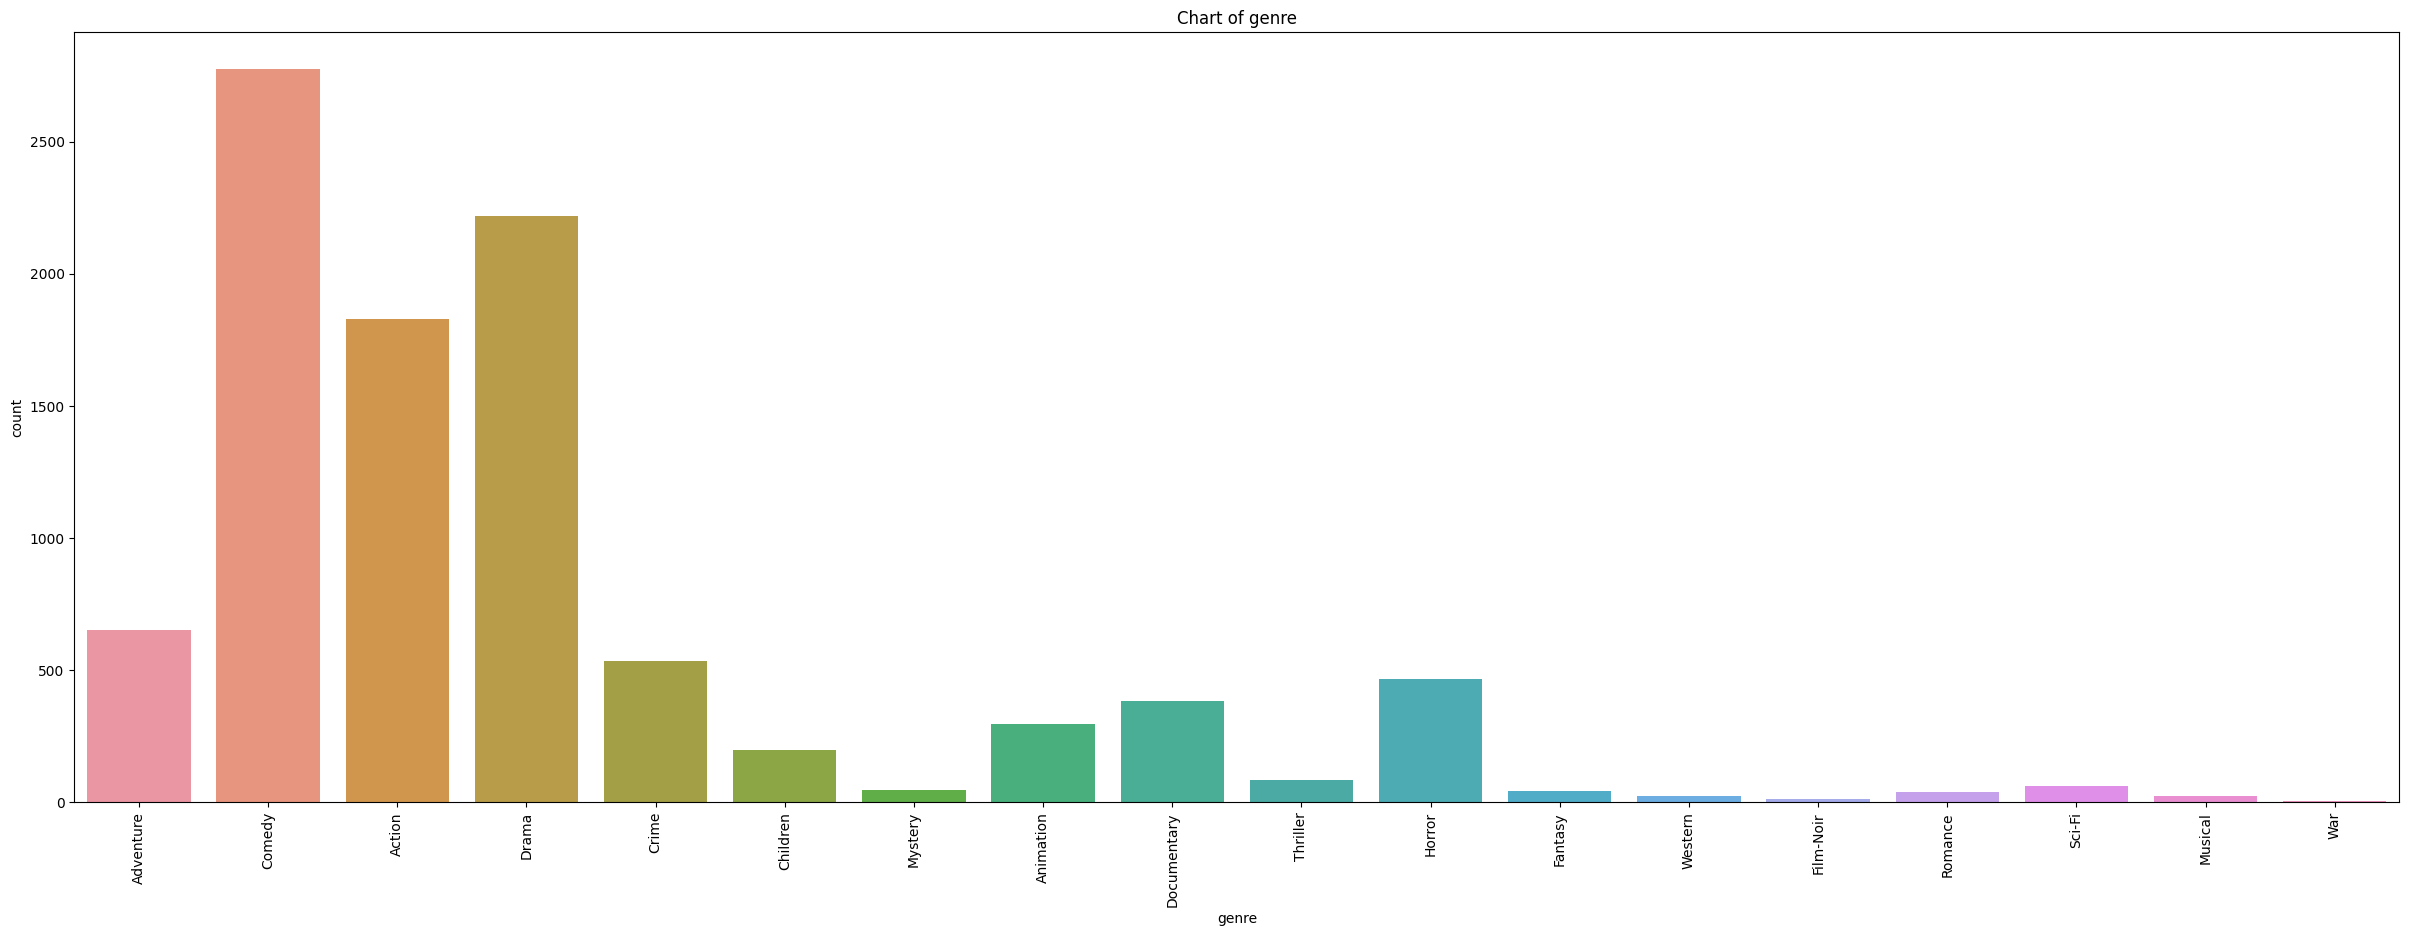

In [43]:
#The plot chart of genre

plt.figure(figsize=(30,10))
plt.xticks(rotation = 90)
sns.countplot(data = df, x = 'genre')
plt.title('Chart of genre')
plt.show()

The most popular genre of all time is comedy.

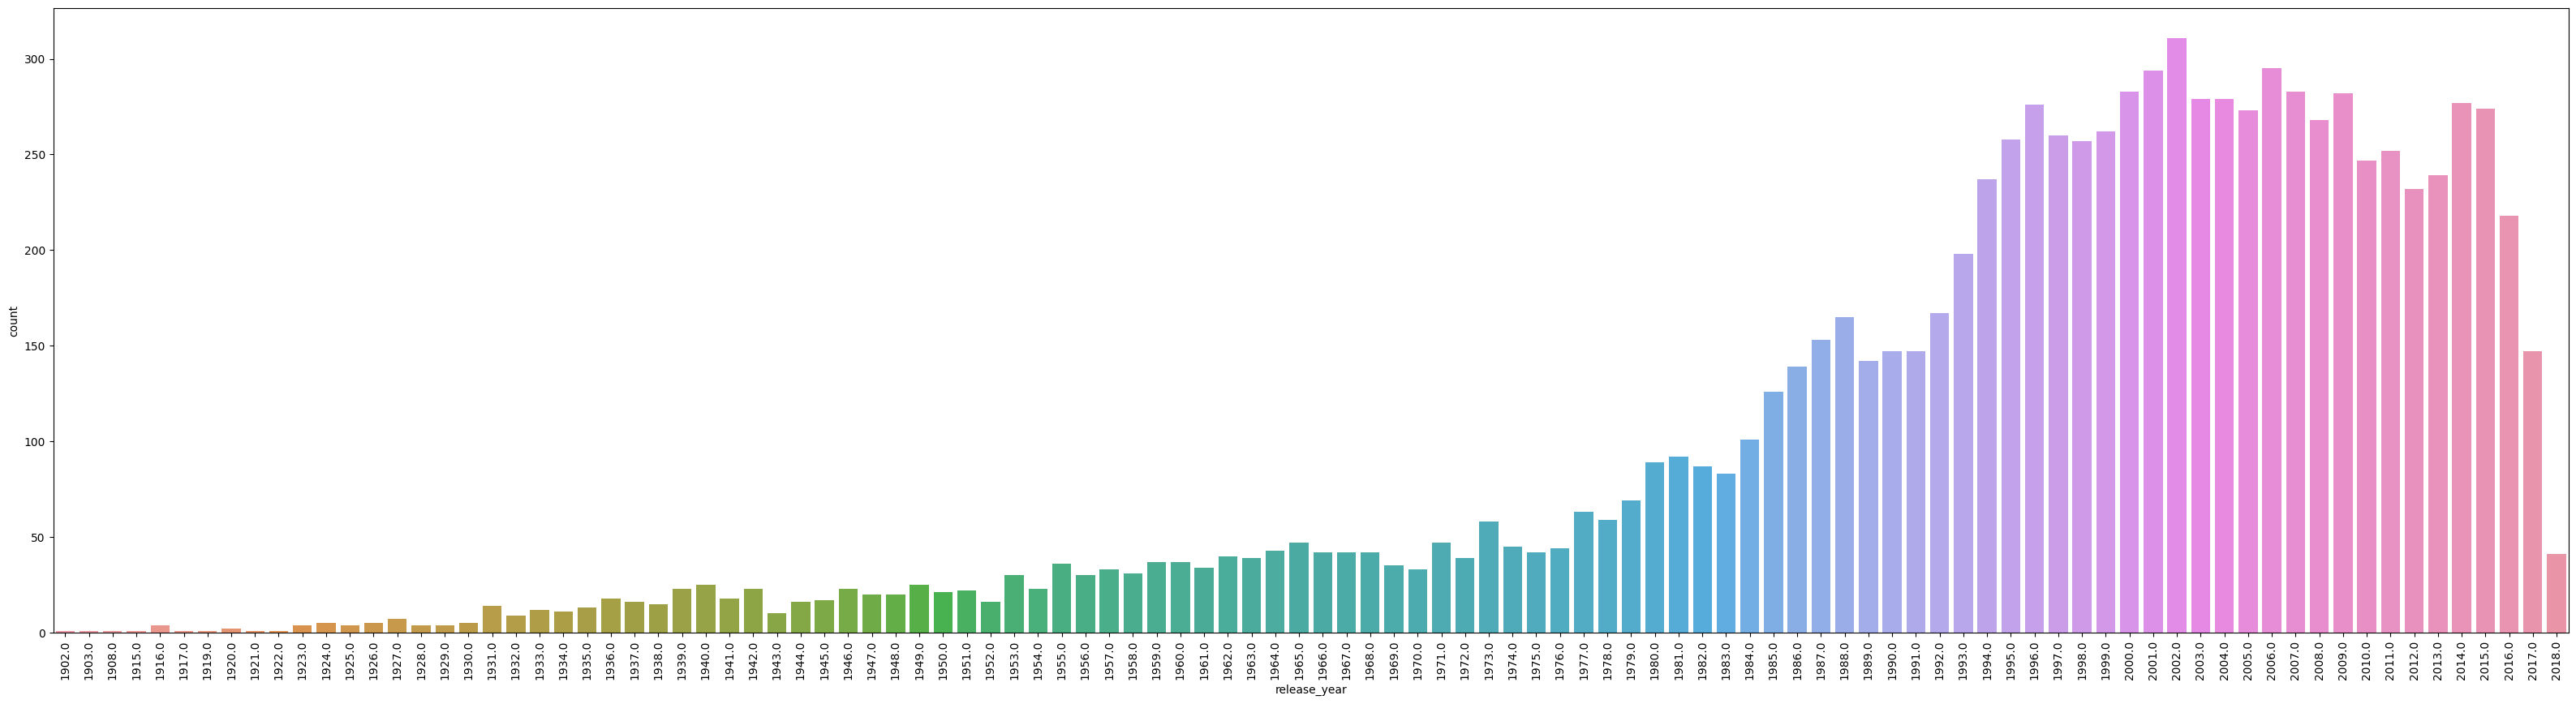

In [29]:
#The plot chart of release_year

plt.figure(figsize=(40,10))
plt.xticks(rotation = 90)
sns.countplot(data = df, x = 'release_year')
plt.show()

Most of the movies were released in the last twenty years. That could be because the technology for creating video content is advancing. The tools for video editing is a hot topic, and it's widely available! Also, a lot of content has become widely open for viewing via internet platforms (such as Netflix), which means increasing the number of audiences.

<AxesSubplot: xlabel='release_year'>

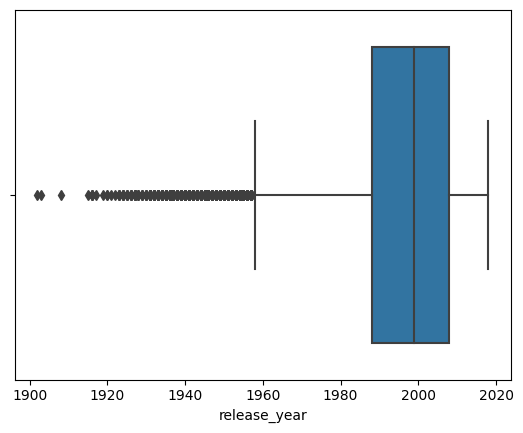

In [30]:
#Distribution of release_year

sns.boxplot(data = df, x = 'release_year')

The diagram above shows how much the number of films made has increased. Interestingly, movies made in the last two decades are treated as outliers.

In [31]:
#Deal with missing values in genre, rating and release_year
#Since we have null values, we have to take care of them either by dropping records or filling them with median values.


df = df[df.genre.notnull()]

print("Genre null values:", df.genre.isnull().sum())

Genre null values: 0


In [32]:
df = df[df.rating.notnull()]

print("Rating null values:", df.rating.isnull().sum())

Rating null values: 0


In [33]:
median_rating = df['release_year'].median()
df['release_year'] = df['release_year'].fillna(median_rating)

print("Release year null values:", df.release_year.isnull().sum())

Release year null values: 0


In [34]:
df['genre'].unique()

array(['Adventure', 'Comedy', 'Action', 'Drama', 'Crime', 'Children',
       'Mystery', 'Animation', 'Documentary', 'Thriller', 'Horror',
       'Fantasy', 'Western', 'Film-Noir', 'Romance', 'Sci-Fi', 'Musical',
       'War'], dtype=object)

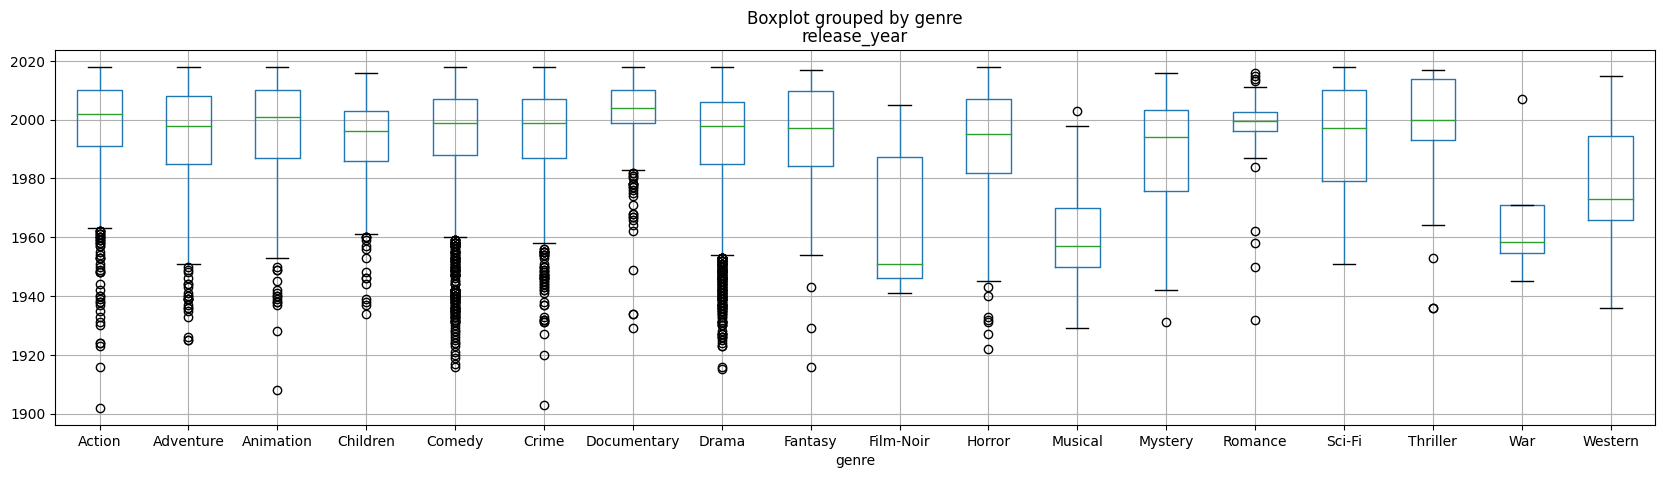

In [35]:
#Release year distribution per genre (Adventure, Comedy, Action, Drama, Crime, Children, Mystery, Animation, Documentary, Thriller, Horror, Fantasy, Western, Film-Noir, Romance, Sci-Fi, Musical)

df.boxplot(column='release_year', by = 'genre', figsize = (20,5));

Most film genres have become popular over the last 20 years, while some movie genres representing war atmospheres were unwanted more than 40 years ago (political structures, World War II, and the Cold War have undoubtedly contributed to this fact). Films that never go out of fashion are comedies and dramas.

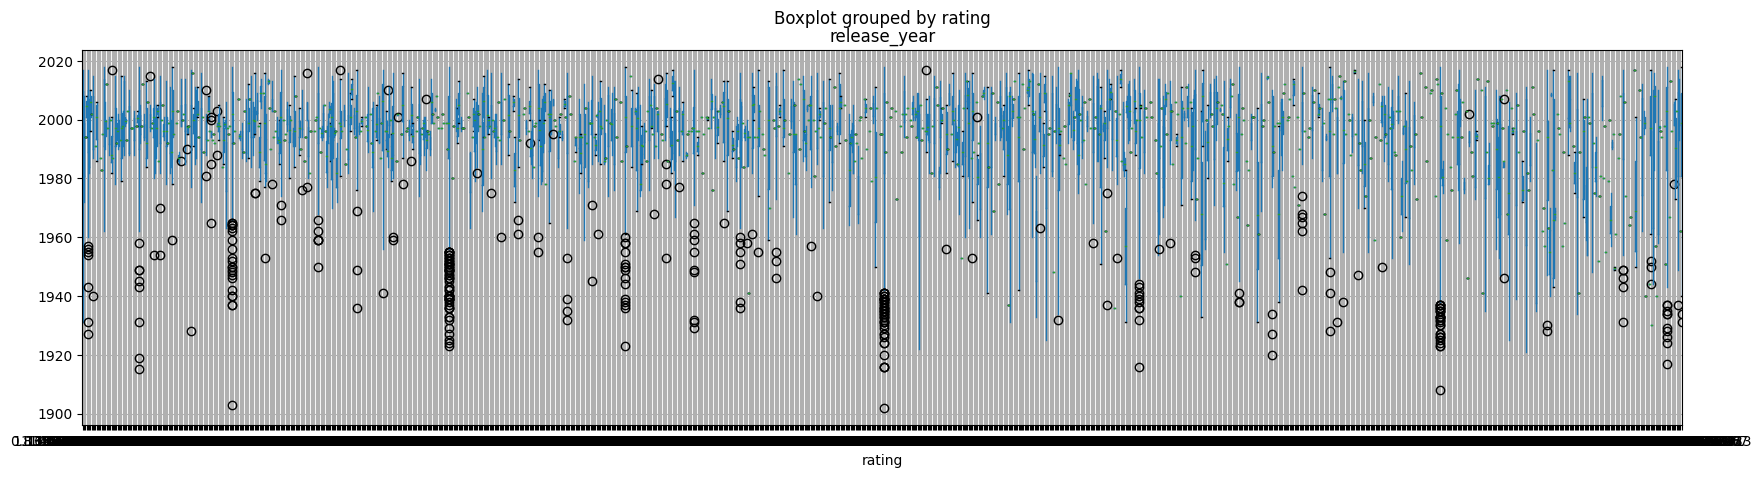

In [36]:
#Release year distribution per rating (Adventure, Comedy, Action, Drama, Crime, Children, Mystery, Animation, Documentary, Thriller, Horror, Fantasy, Western, Film-Noir, Romance, Sci-Fi, Musical)

df.boxplot(column='release_year', by = 'rating', figsize = (20,5));

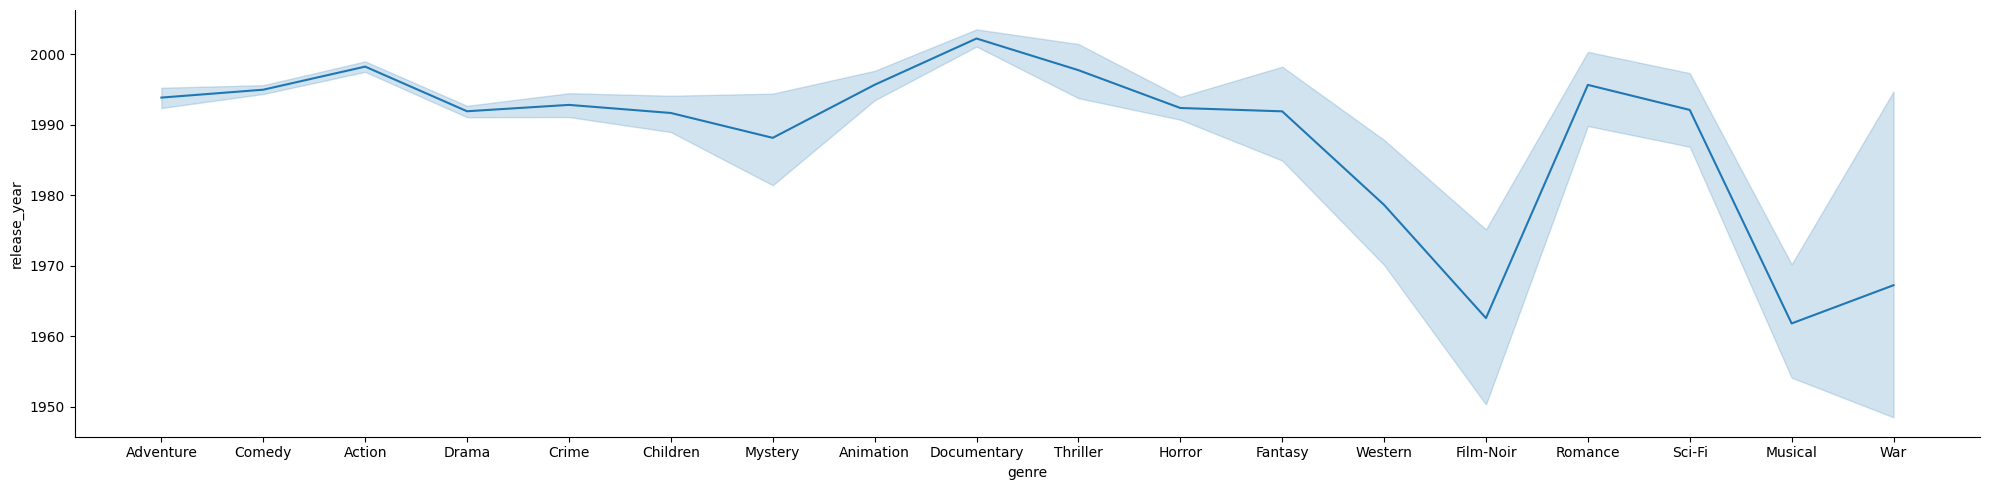

In [37]:
#Median genre distribution per year

sns.relplot(kind = 'line', data = df, x = 'genre', y = 'release_year', aspect = 4);

Judging by the statistics, most documentaries are of more recent date, although they are not the most popular genre, but comedies.

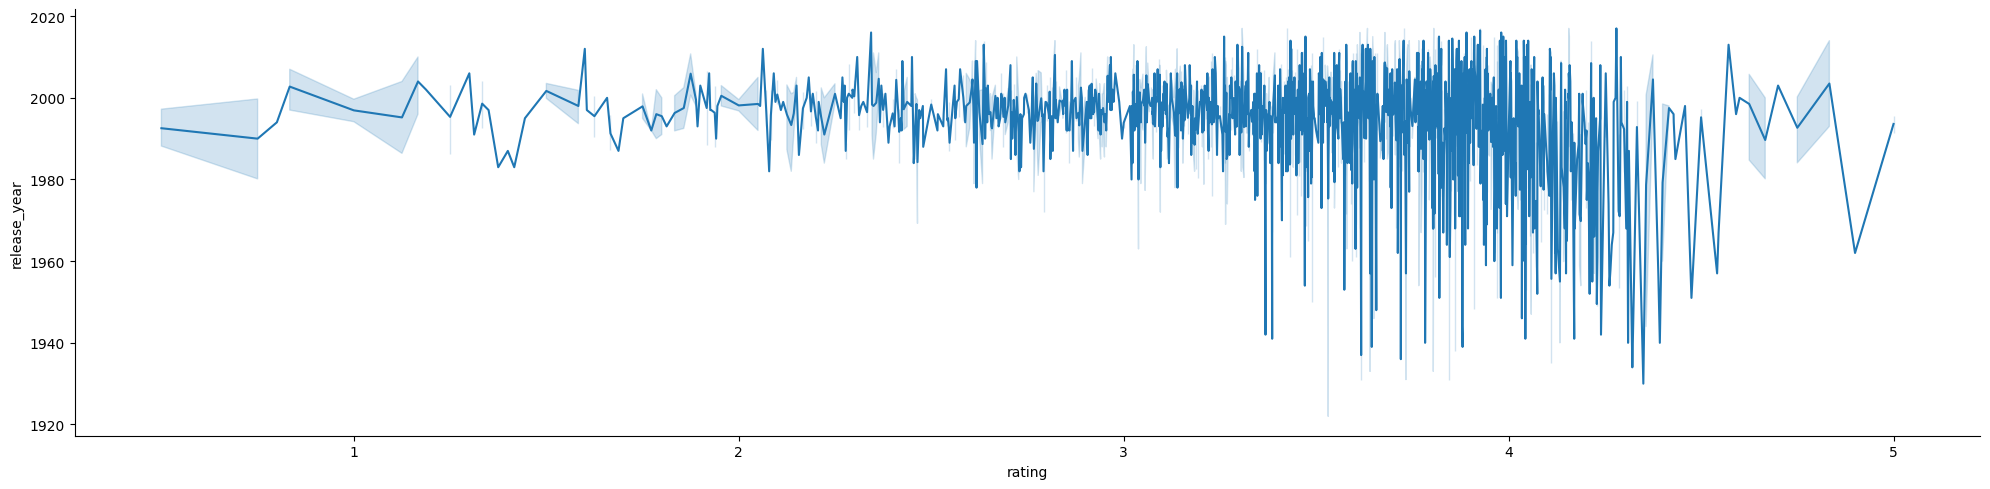

In [38]:
#Median rating distribution per year

sns.relplot(kind = 'line', data = df, x = 'rating', y = 'release_year', aspect = 4);

Most grades are between 3 and 4. This means that users choose wisely content to watch.

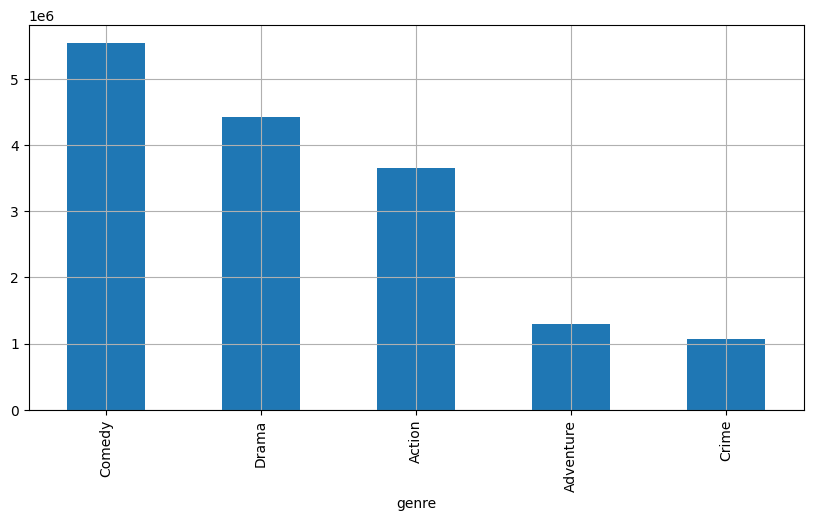

In [39]:
#Top 5 genre categories of all time

df.groupby(df['genre'])['release_year'].sum().sort_values(ascending = False)[:5].plot(
    kind = "bar",grid = True, figsize = (10,5));

Based on everything seen, we can say that the easiest way to gain fame is by making comedies because it's the most popular genre since the beginning of the film industry. Unpopular movies are war-themed movies. We should avoid filming it because that is something the audience takes for granted.

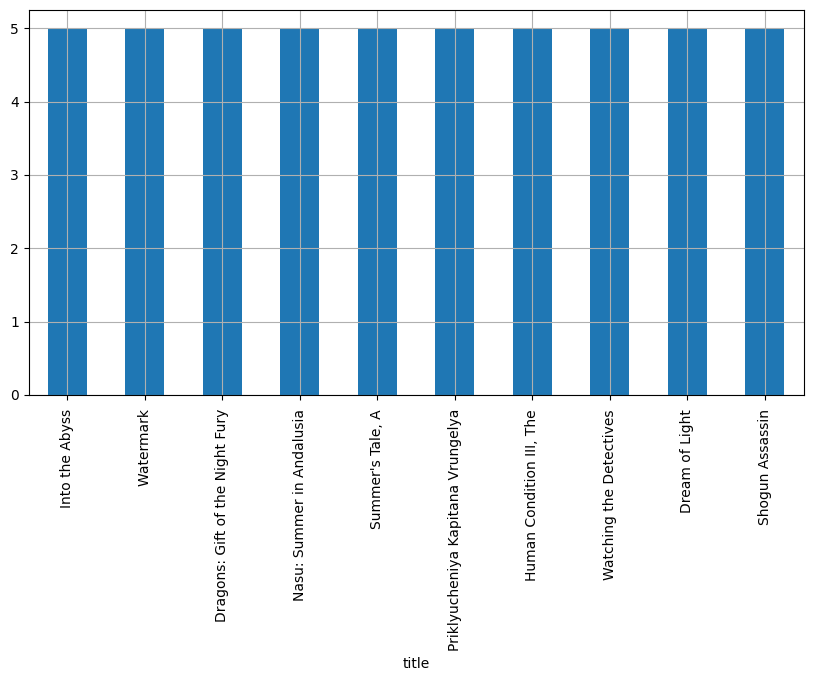

In [40]:
#Top 10 most popular titles of all time (based on users' rating)

df.groupby(df['title'])['rating'].median().sort_values(ascending = False)[:10].plot(
    kind = "bar",grid = True, figsize = (10,5));

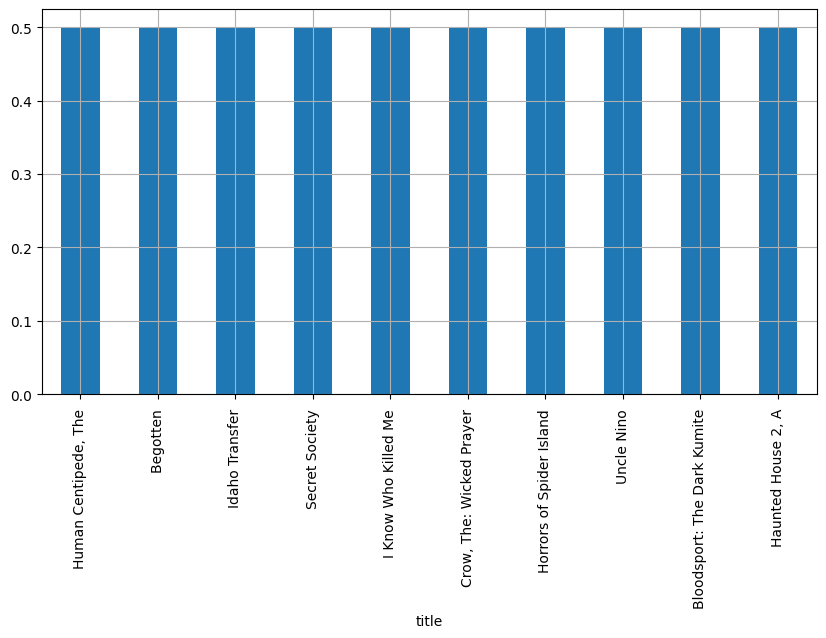

In [41]:
#Worst 10 titles of all time (based on users' rating)

df.groupby(df['title'])['rating'].median().sort_values()[:10].plot(
    kind = "bar",grid = True, figsize = (10,5));

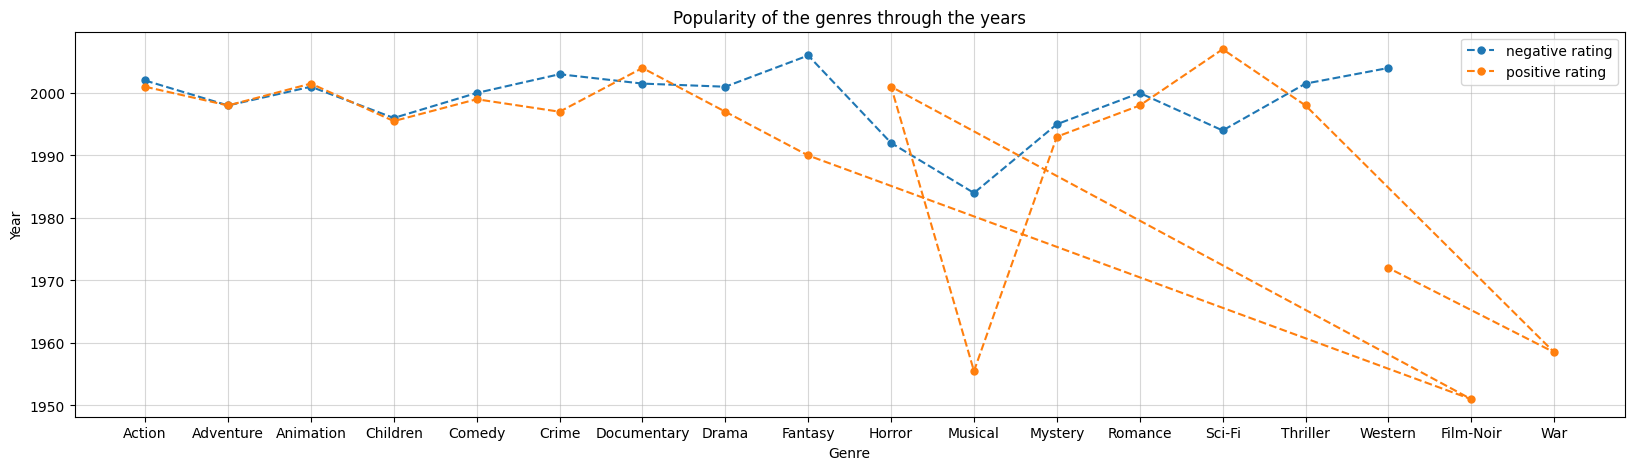

In [42]:
#A comparison of the positive and negative feedback across genres through the years


df_rating_n = df[df['rating'] < 3].copy()
df_rating_p = df[df['rating'] >= 3].copy()

fig, ax = plt.subplots(figsize = (20,5))

ax.plot(df_rating_n.groupby('genre')['release_year'].median(), 
        label = 'negative rating',linestyle = 'dashed', marker = 'o', markersize = 5);

ax.plot(df_rating_p.groupby('genre')['release_year'].median(), 
        label='positive rating', linestyle = 'dashed', marker = 'o', markersize = 5);

ax.set(xlabel = 'Genre',
       ylabel = 'Year', 
       title = "Popularity of the genres through the years")

plt.grid(True, alpha = 0.5)

ax.legend();

Movies rated as the worst today are those with science fiction themes, which is not surprising considering the number of such films, which are often copies or adaptations of old classics. Also, there are western movies that are unpopular nowdays. Most likely, directors ran out of creativity and ideas because 'everything has already been seen'.